## CIFO Project

### Imports

In [1]:
#pip install opencv-python

In [2]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import random
import pandas as pd

### Download Image

We will be trying to recreate thie pikachu image.

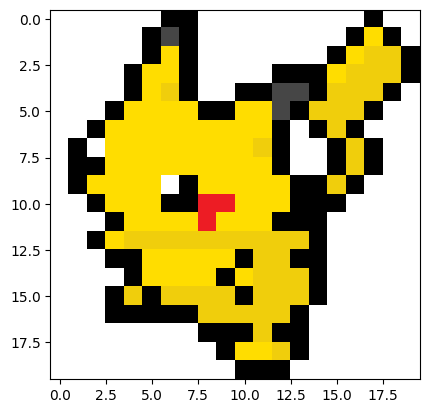

In [3]:
image = mpimg.imread('Pikachu.png')
plt.imshow(image)

In [4]:
image.shape

(20, 20, 4)

We hava an image with the following properties:

- 20 pixels of heigth
- 20 pixels of width

We will now get the RGB matrix of our image, since cv2 uses BGR instead, we will need to make a transformation on the matrix 

In [5]:
pixelGrid = cv2.imread('Pikachu.png')
pixelGrid = cv2.cvtColor(pixelGrid, cv2.COLOR_BGR2RGB)

Let's check the first row of our pixel grid

In [6]:
pixelGrid[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [  0,   0,   0],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

We can see that we have:
- 6 white pixels
- 2 black pixels
- 9 white pixels
- 1 black pixel
- 2 white piexels

Resulting in a total of 20 pixels per row and 400 total pixels

For a matter of simplicity, we will create a function to retrieve the grid of any image

In [7]:
def getOriginalGrid(img):
    pixelGrid = cv2.imread(img)
    pixelGrid = cv2.cvtColor(pixelGrid, cv2.COLOR_BGR2RGB)
    return pixelGrid

In [8]:
getOriginalGrid('Pikachu.png')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 221,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 206,  12],
        [240, 206,  12],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Initial Population

Our search space is huge, if we imagine that we have 256 * 256 * 256 = 16 777 216 different combinations of pixels * 400 pixels in our image, our search space as a total of 6 710 886 400 different solutions.

Therefore our initial population will be a random plausible solution.

In [9]:
def initialPopulation(img, size):

    population = []

    for i in range(size):
        element = getOriginalGrid(img).copy()
        for row in range(len(element)):
            for column in range(len(element[0])):
                for value in range(len(element[0][0])):
                    element[row][column][value] = random.randint(0, 255)
        population.append(element)

    return population

In [10]:
population = initialPopulation('Pikachu.png', 5)

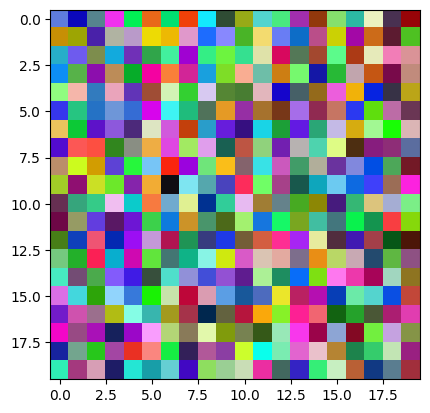

In [11]:
plt.imshow(population[0])

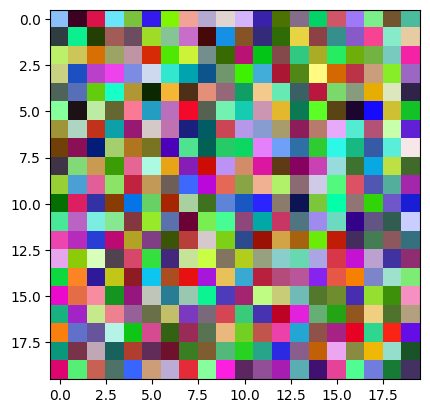

In [12]:
plt.imshow(population[1])

## Fitness Function

For the fitness functions we will go with distances, since it is simple to verify how close an individual is to the original image by calculating the sum of all distances of all its pixels when compared to the original image.

### Euclidean Distance

In [13]:
def getPixelFitnessEuclidean(pixel, target):
    return math.sqrt((int(pixel[0])- int(target[0]))**2 + (int(pixel[1]) - int(target[1]))**2 + (int(pixel[2]) - int(target[2]))**2)

In [14]:
getPixelFitnessEuclidean([123, 54, 234], [130, 2, 200])

62.52199612936234

In [15]:
getPixelFitnessEuclidean([0, 0, 0], [0, 0, 0])

0.0

### Squared Euclidean Distance

In here we will make the sum of the squared euclidean distances.

In [16]:
def getPixelFitnessSquaredEuclidean(pixel, target):
    return math.sqrt((int(pixel[0])- int(target[0]))**2 + (int(pixel[1]) - int(target[1]))**2 + (int(pixel[2]) - int(target[2]))**2)**2

In [17]:
getPixelFitnessSquaredEuclidean([123, 54, 234], [130, 2, 200])

3908.9999999999995

In [18]:
getPixelFitnessSquaredEuclidean([0, 0, 0], [0, 0, 0])

0.0

### Manhattan Distance

A different way to calculate a distance by using the absolute value instead.

In [19]:
def getPixelFitnessManhattan(pixel, target):
    return abs(int(pixel[0]) - int(target[0])) + abs(int(pixel[1]) - int(target[1])) + abs(int(pixel[2]) - int(target[2]))

In [20]:
getPixelFitnessManhattan([123, 54, 234], [130, 2, 200])

93

In [21]:
getPixelFitnessManhattan([0, 0, 0], [0, 0, 0])

0

### Squared Manhattan Distance

Same idea as before, but this time it is the sum of squared Manhattan distances.

In [22]:
def getPixelFitnessSquaredManhattan(pixel, target):
    return (abs(int(pixel[0]) - int(target[0])) + abs(int(pixel[1]) - int(target[1])) + abs(int(pixel[2]) - int(target[2])))**2

In [23]:
getPixelFitnessSquaredManhattan([123, 54, 234], [130, 2, 200])

8649

In [24]:
getPixelFitnessSquaredManhattan([0, 0, 0], [0, 0, 0])

0

### Total Fitness

To calculate the actual fitness of the individual we will need to get the fitness of all of its pixels and them sum of all them.

In [25]:
def getFitness(element, original, fitnessFunction):

    totalFitness = 0

    for row in range(len(element)):
        for column in range(len(element[0])):
            totalFitness = totalFitness + fitnessFunction(element[row][column], original[row][column])
    
    return totalFitness

In [26]:
getFitness(population[0], pixelGrid, getPixelFitnessEuclidean)

95538.34601909612

In [27]:
getFitness(population[0], pixelGrid, getPixelFitnessSquaredEuclidean)

24968559.0

In [28]:
getFitness(population[0], pixelGrid, getPixelFitnessManhattan)

148727

In [29]:
getFitness(population[0], pixelGrid, getPixelFitnessSquaredManhattan)

62040695

## Crossover

For the crossovers we will imlement various ways of changing the genetic material of 2 individuals, the way of doing it will be to go across of their pixels and either apply the crossover or apply a replication.

### Half-Change Crossover

We will for each RGB value have a 50% chance to swap the values between the parents, this will in an extreme case wither create a replication or completely swap the parents.

In [30]:
def halfChangeCrossover(pixel1, pixel2, crossoverProb = 0.8):

    if random.random() <= crossoverProb:
        R_index = random.randint(1, 100)
        G_index = random.randint(1, 100)
        B_index = random.randint(1, 100)

        if R_index <= 50:
            temp = pixel1[0]
            pixel1[0] = pixel2[0]
            pixel2[0] = temp

        if G_index <= 50:
            temp = pixel1[1]
            pixel1[1] = pixel2[1]
            pixel2[1] = temp

        if B_index <= 50:
            temp = pixel1[2]
            pixel1[2] = pixel2[2]
            pixel2[2] = temp
   
    return pixel1, pixel2

In [31]:
halfChangeCrossover([1,2,3], [4,5,6])

([4, 2, 6], [1, 5, 3])

### Single-Point Crossover

In here we will just select a middle index of the array, either 1 or 2, and swap the values from that index forward with the other parent.

In [32]:
def singlePointCrossover(pixel1, pixel2, crossoverProb=0.8):
    if random.random() < crossoverProb:
        crossoverPoint = random.randint(1, 2)
        
        if crossoverPoint == 1:
            temp = pixel1[1]
            pixel1[1] = pixel2[1]
            pixel2[1] = temp

        temp = pixel1[2]
        pixel1[2] = pixel2[2]
        pixel2[2] = temp

    return pixel1, pixel2

In [33]:
singlePointCrossover([1,2,3], [4,5,6])

([1, 5, 6], [4, 2, 3])

### Arithmetic Crossover

In the Arithmetic crossover the objective is to, based on an alpha, reach a middle pixel between both parents.

In [34]:
def arithmeticCrossover(pixel1, pixel2, alpha=0.5, crossoverProb=0.8):

    if random.random() <= crossoverProb:
        pixel1, pixel2 = [round(alpha * pixel1[0] + (1 - alpha) * pixel2[0]), round(alpha * pixel1[1] + (1 - alpha) * pixel2[1]), round(alpha * pixel1[2] + (1 - alpha) * pixel2[2])], [round((1 - alpha) * pixel1[0] + alpha * pixel2[0]), round((1 - alpha) * pixel1[1] + alpha * pixel2[1]), round((1 - alpha) * pixel1[2] + alpha * pixel2[2])]
    
    return pixel1, pixel2

In [35]:
arithmeticCrossover([1,2,3], [4,5,6])

([2, 4, 4], [2, 4, 4])

Higher alpha would mean that offspring are closer to the first parent.

## Mutation

For the mutations we will go across all pixels and apply some distortion of the original pixel in order to try to get to a better individual.

### Uniform Mutation

Simply create an entire new pixel.

In [37]:
def uniformMutation(pixel, mutationProb=0.05):

    if random.random() <= mutationProb:
        for i in range(len(pixel)):
            pixel[i] = random.randint(0, 255)

    return pixel

In [38]:
uniformMutation([1,2,3])

[1, 2, 3]

### Shuffle Mutation

Shuffle the RGB values randomly, the values will all be there, just in different positions, or not.

In [39]:
def shuffleMutation(pixel, mutationProb=0.05):

    shuffledPixel = pixel[:]

    if random.random() <= mutationProb:
        random.shuffle(shuffledPixel)
    return shuffledPixel

In [40]:
shuffleMutation([1,2,3])

[1, 2, 3]

## Seletion

An extremely important step, this will be were we will select which individuals will compose the next generation.

### Roulette Selection

The probability of selecting an individual is directly associated with ist fitness, a lower fitness means a higher probability of being choosen.

Example:

- Fitnesses = [1, 2, 3] 
- Probabilities = [1/6, 2/6, 3/6] = [0.167, 0.33, 0.5]
- Probabilities = [1-0,167, 1-0.33, 1-0.5] = [0.833, 0.66, 0.5] 
- Probabilities = [0.833/1.993, 0.66/1.993, 0.5/1.993] = [0.417, 0.331, 0.251]

Therefore the final probabilities would be [0.417, 0.331, 0.251]

In [41]:
import numpy.random as npr
def rouletteSelection(population, original, getFitness, function):
    
    totalFitnesses = sum([getFitness(element, original, function) for element in population])

    selectionProbs = [1 - getFitness(element, original, function)/totalFitnesses for element in population]

    selectionProbs = [prob / sum(selectionProbs) for prob in selectionProbs]

    newPopulation = []

    for _ in range(len(population)):
        newPopulation.append(population[npr.choice(len(population), p=selectionProbs)])

    return newPopulation

In [42]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

95538.34601909612
94730.38169241363
94838.50012520858
91520.57087535835
95556.9379076358


In [43]:
newPopulation = rouletteSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

94730.38169241363
94838.50012520858
95556.9379076358
95556.9379076358
95556.9379076358


### Rank Selection

Similar to the roulette selection, but in here we the gap between fitnesses is not relevant. We will simply give a higer rank to the lower fitness and so on until we reach rank 1.

In [44]:
def rankSelection(population, original, getFitness, function):
    
    fitnesses = [getFitness(element, original, function) for element in population]

    for i in range(len(fitnesses)):
        fitnesses[fitnesses.index(max(fitnesses))] = i + 1

    selectionProbs = [rank / sum(fitnesses) for rank in fitnesses]

    newPopulation = []

    for _ in range(len(population)):
        newPopulation.append(population[npr.choice(len(population), p=selectionProbs)])

    return newPopulation

In [45]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

95538.34601909612
94730.38169241363
94838.50012520858
91520.57087535835
95556.9379076358


In [46]:
newPopulation = rankSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

91520.57087535835
94838.50012520858
95538.34601909612
95538.34601909612
94838.50012520858


### Tournament Selection

For the tournament, we will need to select a size for the tournament, meaning how many individuals will be randomly selected from the population to compete. We will then select the best individual within the tournament.

Since we decided to use a population size of 100, we decided than 20% of that for the size was a good enough value to start. If this selection algorithm ends up being to similar to the other, we can always try to change the tournament size to adhust the selection pressure.

In [47]:
def tournamentSelection(population, original, getFitness, function, size=20):

    newPopulation = []

    for _ in range(len(population)):

        tournament = []

        for _ in range(size):
            tournament.append(population[random.randint(0, len(population)-1)])

        tournamentFitnesses = [getFitness(element, original, function) for element in tournament]

        newPopulation.append(tournament[tournamentFitnesses.index(min(tournamentFitnesses))])

    return newPopulation

In [48]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

95538.34601909612
94730.38169241363
94838.50012520858
91520.57087535835
95556.9379076358


In [49]:
newPopulation = tournamentSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

91520.57087535835
91520.57087535835
91520.57087535835
91520.57087535835
91520.57087535835


## Genetic Algorithm

First we will create an initialization funtion that will receive both the image that we want to recreate as well as the number of indiviuals that should exist in a population.

In [50]:
def initialize(img, populationSize):
    originalGrid = getOriginalGrid(img)
    population = initialPopulation(img, populationSize)
    return originalGrid, population

With all of this done, we are ready to create the actual GA, which is very straighforward.

We will apply the specified fitness, selection, crossover and mutation, witht the specified probabilties.

We have also implemented elitism, so we should always see a better or equal fitness at each generation when compared to the one before.

We have also decided to print every 100 generations the current fitness value, that way we can have an idea of the progress of the algorithm.

Finally, we will return a dataframe with the fitnesses at every generation and also the best individual.

In [51]:
def geneticAlgorithm(population, original, fitness, crossover, mutation, selection, numberGenerations=1000, crossoverProb = 0.8, mutationProb = 0.01, elitism=True):
    
    df = pd.DataFrame(columns=['fitness'])
    
    for generation in range(numberGenerations + 1):

        selectedPopulation = selection(population, original, getFitness, fitness)

        newPopulation = []

        for i in range(0, len(selectedPopulation), 2):
            parent1, parent2 = selectedPopulation[i], selectedPopulation[min(i+1, len(selectedPopulation)-1)]
            child1, child2 = parent1.copy(), parent2.copy()

        for row in range(len(parent1)):
            for col in range(len(parent1[0])):
                child1[row][col], child2[row][col] = crossover(parent1[row][col], parent2[row][col], crossoverProb=crossoverProb)
                child1[row][col] = mutation(child1[row][col], mutationProb=mutationProb)
                child2[row][col] = mutation(child2[row][col], mutationProb=mutationProb)
        newPopulation.append(child1)
        newPopulation.append(child2)

        population = newPopulation.copy()

        if elitism and generation >  0:
            population[fitnesses.index(max(fitnesses))] = bestElement.copy()

        fitnesses = [getFitness(element, original, fitness) for element in population]

        bestElement = population[fitnesses.index(min(fitnesses))].copy()

        if generation % 100 == 0:
            print("Generation:", generation)
            print("Best Fitness:", fitnesses[fitnesses.index(min(fitnesses))])

        df.loc[generation] = [fitnesses[fitnesses.index(min(fitnesses))]]

    return bestElement, df

## Intermediate Approaches

For the comparison of all Selection Algorithms we will use the Single-Point Crossover and the Uniform Mutation for all of them as the basis for the comparison.

Due to the probabilistic nature of the problem and the complexity of it we will need to make various runs and average them out in order to make some conclusions, therefore we will run every combination 10 times.

In [51]:
compareResults = pd.DataFrame()

### Euclidean Distance

#### Selection

##### Roulette

In [111]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=rouletteSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 94521.70837134226
Generation: 100
Best Fitness: 88846.39049952946
Generation: 200
Best Fitness: 86078.256915209
Generation: 300
Best Fitness: 82679.24329448924
Generation: 400
Best Fitness: 79833.90966941179
Generation: 500
Best Fitness: 77920.92352943742
Generation: 600
Best Fitness: 77025.71512781785
Generation: 700
Best Fitness: 76322.56263684818
Generation: 800
Best Fitness: 74855.68530008059
Generation: 900
Best Fitness: 74277.57456286244
Generation: 1000
Best Fitness: 73876.91790484023
----------------------
Run: 1
Generation: 0
Best Fitness: 94519.41075524423
Generation: 100
Best Fitness: 89721.61091592742
Generation: 200
Best Fitness: 85782.30090092734
Generation: 300
Best Fitness: 83097.02400752946
Generation: 400
Best Fitness: 81610.91867141037
Generation: 500
Best Fitness: 79785.18125617948
Generation: 600
Best Fitness: 77961.92184823628
Generation: 700
Best Fitness: 77235.71072648001
Generation: 800
Best Fitness: 76005.77195258357
Generati

In [112]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    94304.080583
1    94168.311936
2    94154.920064
3    94065.707710
4    94022.651247
Name: AverageFitness, dtype: float64

In [113]:
compareResults["EuclideanRoulette"] = finalResults["AverageFitness"]

##### Rank Selection

In [114]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=rankSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 94704.53240848769
Generation: 100
Best Fitness: 89813.32624712706
Generation: 200
Best Fitness: 85458.08458887895
Generation: 300
Best Fitness: 82918.3510499876
Generation: 400
Best Fitness: 80538.79848158517
Generation: 500
Best Fitness: 78751.80782557279
Generation: 600
Best Fitness: 76914.28070423917
Generation: 700
Best Fitness: 76257.6423994579
Generation: 800
Best Fitness: 74966.94645369111
Generation: 900
Best Fitness: 73420.31914612431
Generation: 1000
Best Fitness: 72030.17309746305
----------------------
Run: 1
Generation: 0
Best Fitness: 93410.85573935673
Generation: 100
Best Fitness: 88368.77606263192
Generation: 200
Best Fitness: 85676.9480381009
Generation: 300
Best Fitness: 84394.74854605456
Generation: 400
Best Fitness: 82349.42033347105
Generation: 500
Best Fitness: 79767.35081849298
Generation: 600
Best Fitness: 77735.26785579341
Generation: 700
Best Fitness: 75513.10409821167
Generation: 800
Best Fitness: 74313.03072318081
Generatio

In [115]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    93328.022343
1    93328.022343
2    93328.022343
3    93304.671367
4    93246.896430
Name: AverageFitness, dtype: float64

In [116]:
compareResults["EuclideanRank"] = finalResults["AverageFitness"]

##### Tournament Selection

In [117]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 91147.51518629106
Generation: 100
Best Fitness: 86069.49194112836
Generation: 200
Best Fitness: 81477.13169536501
Generation: 300
Best Fitness: 79106.57125350254
Generation: 400
Best Fitness: 77102.91057079521
Generation: 500
Best Fitness: 74631.86136771165
Generation: 600
Best Fitness: 73202.20430917009
Generation: 700
Best Fitness: 72184.54620099682
Generation: 800
Best Fitness: 71093.255687252
Generation: 900
Best Fitness: 69599.5741334132
Generation: 1000
Best Fitness: 69012.21503486382
----------------------
Run: 1
Generation: 0
Best Fitness: 90972.95484752794
Generation: 100
Best Fitness: 83545.59442666636
Generation: 200
Best Fitness: 79674.01550524271
Generation: 300
Best Fitness: 76980.41448450905
Generation: 400
Best Fitness: 75717.90414196235
Generation: 500
Best Fitness: 73911.3035519354
Generation: 600
Best Fitness: 72334.15524244135
Generation: 700
Best Fitness: 71270.83109092596
Generation: 800
Best Fitness: 70227.01353996243
Generation

In [118]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    91391.987210
1    91319.401588
2    91275.225458
3    91192.072925
4    91124.145313
Name: AverageFitness, dtype: float64

In [119]:
compareResults["EuclideanTournament"] = finalResults["AverageFitness"]

##### Analsysis

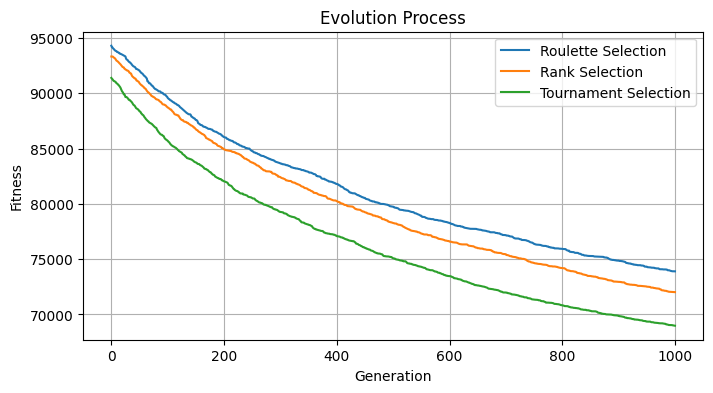

In [120]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["EuclideanRoulette"], label='Roulette Selection')
plt.plot(compareResults["EuclideanRank"], label='Rank Selection')
plt.plot(compareResults["EuclideanTournament"], label='Tournament Selection')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

As we can see the Torunament Selection is the clear winner.

#### Crossover

##### Half-Change Crossover

In [121]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=halfChangeCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 90958.04258188973
Generation: 100
Best Fitness: 85127.5484511482
Generation: 200
Best Fitness: 82514.30221274174
Generation: 300
Best Fitness: 79437.86495427477
Generation: 400
Best Fitness: 78002.78368142867
Generation: 500
Best Fitness: 76325.12696170616
Generation: 600
Best Fitness: 75092.14072292598
Generation: 700
Best Fitness: 72936.63858484314
Generation: 800
Best Fitness: 72114.51812035628
Generation: 900
Best Fitness: 70429.01716275651
Generation: 1000
Best Fitness: 69459.01389753498
----------------------
Run: 1
Generation: 0
Best Fitness: 90624.14871840311
Generation: 100
Best Fitness: 84350.23873499501
Generation: 200
Best Fitness: 80522.94006694655
Generation: 300
Best Fitness: 77908.80527854421
Generation: 400
Best Fitness: 75733.42394888111
Generation: 500
Best Fitness: 73064.92366549064
Generation: 600
Best Fitness: 72130.79500630032
Generation: 700
Best Fitness: 70696.22620370735
Generation: 800
Best Fitness: 70202.0140823031
Generati

In [122]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    91258.853873
1    91244.939647
2    91230.778475
3    91192.191170
4    91180.891939
Name: AverageFitness, dtype: float64

In [123]:
compareResults["EuclideanHalfChange"] = finalResults["AverageFitness"]

##### Arithmetic Crossover

In [124]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=arithmeticCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 88284.42633112668
Generation: 100
Best Fitness: 85082.30700223695
Generation: 200
Best Fitness: 82613.20419152889
Generation: 300
Best Fitness: 79171.45215313006
Generation: 400
Best Fitness: 77380.48003800081
Generation: 500
Best Fitness: 74936.0360482007
Generation: 600
Best Fitness: 73456.53257347493
Generation: 700
Best Fitness: 72250.15200250663
Generation: 800
Best Fitness: 70741.11305062285
Generation: 900
Best Fitness: 69506.36158704036
Generation: 1000
Best Fitness: 68398.7002162395
----------------------
Run: 1
Generation: 0
Best Fitness: 87586.50555546864
Generation: 100
Best Fitness: 85076.13899174413
Generation: 200
Best Fitness: 81981.06395419713
Generation: 300
Best Fitness: 79363.97766593935
Generation: 400
Best Fitness: 77210.6297741621
Generation: 500
Best Fitness: 74460.40763601901
Generation: 600
Best Fitness: 73955.88936198017
Generation: 700
Best Fitness: 72292.18957878629
Generation: 800
Best Fitness: 70765.55068941947
Generatio

In [125]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    88991.213676
1    88964.374608
2    88906.747638
3    88897.477280
4    88832.553612
Name: AverageFitness, dtype: float64

In [126]:
compareResults["EuclideanArithmetic"] = finalResults["AverageFitness"]

##### Analysis

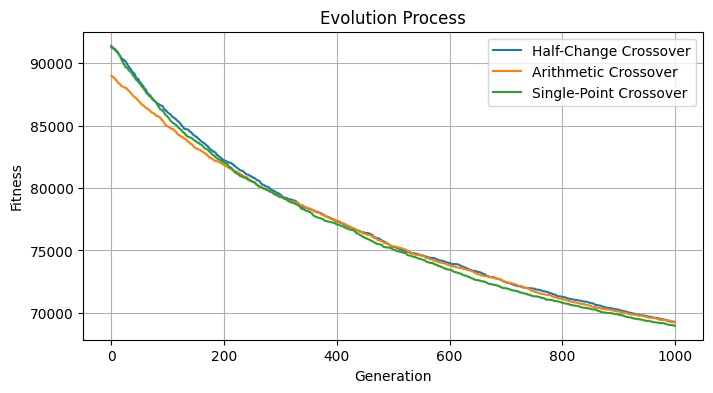

In [127]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["EuclideanHalfChange"], label='Half-Change Crossover')
plt.plot(compareResults["EuclideanArithmetic"], label='Arithmetic Crossover')
plt.plot(compareResults["EuclideanTournament"], label='Single-Point Crossover')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

For the crossover they are all very identical, but we can see that the Single-Point was slighlty better.

#### Mutation

##### Shuffle Mutation

In [128]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=singlePointCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 91276.93234077016
Generation: 100
Best Fitness: 87690.23817841127
Generation: 200
Best Fitness: 85682.58547930518
Generation: 300
Best Fitness: 84463.9974659691
Generation: 400
Best Fitness: 83623.75314033226
Generation: 500
Best Fitness: 82674.07590741986
Generation: 600
Best Fitness: 82047.77062891008
Generation: 700
Best Fitness: 80801.08598525441
Generation: 800
Best Fitness: 80464.00340075302
Generation: 900
Best Fitness: 80114.30663959615
Generation: 1000
Best Fitness: 79474.013657143
----------------------
Run: 1
Generation: 0
Best Fitness: 91712.82119796841
Generation: 100
Best Fitness: 88953.13408372665
Generation: 200
Best Fitness: 87974.51436256166
Generation: 300
Best Fitness: 87009.52547970158
Generation: 400
Best Fitness: 85604.192180524
Generation: 500
Best Fitness: 84685.7123331333
Generation: 600
Best Fitness: 84035.55202295023
Generation: 700
Best Fitness: 83650.75228513374
Generation: 800
Best Fitness: 82958.11872204705
Generation: 

In [129]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    91462.381171
1    91453.559888
2    91450.697892
3    91383.167156
4    91267.207100
Name: AverageFitness, dtype: float64

In [130]:
compareResults["EuclideanShuffle"] = finalResults["AverageFitness"]

##### Analysis

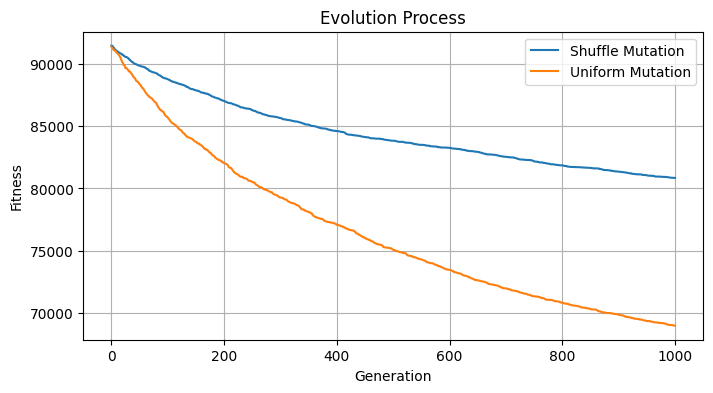

In [131]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["EuclideanShuffle"], label='Shuffle Mutation')
plt.plot(compareResults["EuclideanTournament"], label='Uniform Mutation')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

For the mutation the Uniform was way better.

##### Best Combination

- Fitness: Euclidean
- Selection: Tournament
- Crossover: Single-Point
- Mutation: Uniform

### Squared Euclidean Distance

#### Selection

##### Roulette Selection

In [132]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=rouletteSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 24042345.0
Generation: 100
Best Fitness: 22533705.0
Generation: 200
Best Fitness: 21323307.0
Generation: 300
Best Fitness: 20126390.0
Generation: 400
Best Fitness: 19426554.0
Generation: 500
Best Fitness: 18637094.0
Generation: 600
Best Fitness: 18223035.0
Generation: 700
Best Fitness: 17818323.0
Generation: 800
Best Fitness: 17209385.0
Generation: 900
Best Fitness: 16799905.0
Generation: 1000
Best Fitness: 16296056.0
----------------------
Run: 1
Generation: 0
Best Fitness: 24612702.0
Generation: 100
Best Fitness: 22284660.0
Generation: 200
Best Fitness: 20551416.0
Generation: 300
Best Fitness: 19402558.0
Generation: 400
Best Fitness: 18699452.0
Generation: 500
Best Fitness: 17598639.0
Generation: 600
Best Fitness: 17217418.0
Generation: 700
Best Fitness: 16900462.0
Generation: 800
Best Fitness: 16251281.0
Generation: 900
Best Fitness: 16161332.0
Generation: 1000
Best Fitness: 15767723.0
----------------------
Run: 2
Generation: 0
Best Fitness: 24120

In [133]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    23979922.2
1    23961361.3
2    23944040.1
3    23897594.6
4    23885609.3
Name: AverageFitness, dtype: float64

In [134]:
compareResults["SquaredEuclideanRoulette"] = finalResults["AverageFitness"]

##### Rank Selection

In [135]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=rankSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 24093963.0
Generation: 100
Best Fitness: 21143077.0
Generation: 200
Best Fitness: 19446577.0
Generation: 300
Best Fitness: 18283817.0
Generation: 400
Best Fitness: 17376275.0
Generation: 500
Best Fitness: 16723741.0
Generation: 600
Best Fitness: 16500176.0
Generation: 700
Best Fitness: 15820427.0
Generation: 800
Best Fitness: 15586692.0
Generation: 900
Best Fitness: 15119822.0
Generation: 1000
Best Fitness: 14473069.0
----------------------
Run: 1
Generation: 0
Best Fitness: 23730558.0
Generation: 100
Best Fitness: 21781785.0
Generation: 200
Best Fitness: 19839782.0
Generation: 300
Best Fitness: 18786511.0
Generation: 400
Best Fitness: 17988206.0
Generation: 500
Best Fitness: 17654661.0
Generation: 600
Best Fitness: 16966409.0
Generation: 700
Best Fitness: 16433084.0
Generation: 800
Best Fitness: 15934778.0
Generation: 900
Best Fitness: 15481339.0
Generation: 1000
Best Fitness: 14977163.0
----------------------
Run: 2
Generation: 0
Best Fitness: 24709

In [136]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    24061564.6
1    23917280.4
2    23899870.6
3    23869138.7
4    23846822.1
Name: AverageFitness, dtype: float64

In [137]:
compareResults["SquaredEuclideanRank"] = finalResults["AverageFitness"]

##### Tournament Selection

In [138]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 23093314.0
Generation: 100
Best Fitness: 20410334.0
Generation: 200
Best Fitness: 18524655.0
Generation: 300
Best Fitness: 17450355.0
Generation: 400
Best Fitness: 16573809.0
Generation: 500
Best Fitness: 15820404.0
Generation: 600
Best Fitness: 15198653.0
Generation: 700
Best Fitness: 14970450.0
Generation: 800
Best Fitness: 14430153.0
Generation: 900
Best Fitness: 13981413.0
Generation: 1000
Best Fitness: 13753398.0
----------------------
Run: 1
Generation: 0
Best Fitness: 23063237.0
Generation: 100
Best Fitness: 20357693.0
Generation: 200
Best Fitness: 18773364.0
Generation: 300
Best Fitness: 17758203.0
Generation: 400
Best Fitness: 17148885.0
Generation: 500
Best Fitness: 15898064.0
Generation: 600
Best Fitness: 15398972.0
Generation: 700
Best Fitness: 15089544.0
Generation: 800
Best Fitness: 14510760.0
Generation: 900
Best Fitness: 14035939.0
Generation: 1000
Best Fitness: 13786467.0
----------------------
Run: 2
Generation: 0
Best Fitness: 23183

In [139]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    23155910.2
1    23114432.8
2    23080635.4
3    23046567.1
4    23029420.5
Name: AverageFitness, dtype: float64

In [140]:
compareResults["SquaredEuclideanTournament"] = finalResults["AverageFitness"]

##### Analysis

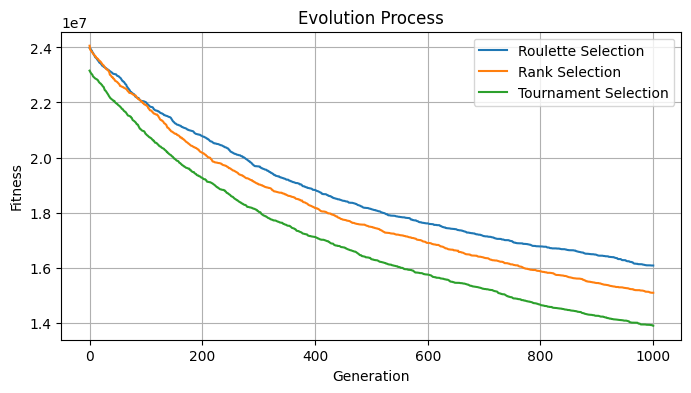

In [141]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["SquaredEuclideanRoulette"], label='Roulette Selection')
plt.plot(compareResults["SquaredEuclideanRank"], label='Rank Selection')
plt.plot(compareResults["SquaredEuclideanTournament"], label='Tournament Selection')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

Once again, the Tournament Selection ended being the best choice.

#### Crossover

##### Half-Change Crossover

In [142]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredEuclidean, crossover=halfChangeCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 22902260.0
Generation: 100
Best Fitness: 20794912.0
Generation: 200
Best Fitness: 19371598.0
Generation: 300
Best Fitness: 18701918.0
Generation: 400
Best Fitness: 17316990.0
Generation: 500
Best Fitness: 16645761.0
Generation: 600
Best Fitness: 15770128.0
Generation: 700
Best Fitness: 15391998.0
Generation: 800
Best Fitness: 14712472.0
Generation: 900
Best Fitness: 14323465.0
Generation: 1000
Best Fitness: 14016362.0
----------------------
Run: 1
Generation: 0
Best Fitness: 23111929.0
Generation: 100
Best Fitness: 21329426.0
Generation: 200
Best Fitness: 19104644.0
Generation: 300
Best Fitness: 17695079.0
Generation: 400
Best Fitness: 17081243.0
Generation: 500
Best Fitness: 16074210.0
Generation: 600
Best Fitness: 15429304.0
Generation: 700
Best Fitness: 14957681.0
Generation: 800
Best Fitness: 14599079.0
Generation: 900
Best Fitness: 14114992.0
Generation: 1000
Best Fitness: 13854906.0
----------------------
Run: 2
Generation: 0
Best Fitness: 23520

In [143]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    23105426.7
1    23069785.8
2    23038508.9
3    23034487.6
4    22983576.2
Name: AverageFitness, dtype: float64

In [144]:
compareResults["SquaredEuclideanHalfChange"] = finalResults["AverageFitness"]

##### Arithmetic Crossover

In [145]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredEuclidean, crossover=arithmeticCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 21073506.0
Generation: 100
Best Fitness: 19713715.0
Generation: 200
Best Fitness: 18603323.0
Generation: 300
Best Fitness: 17720566.0
Generation: 400
Best Fitness: 17045044.0
Generation: 500
Best Fitness: 16220754.0
Generation: 600
Best Fitness: 15753957.0
Generation: 700
Best Fitness: 15225242.0
Generation: 800
Best Fitness: 14801494.0
Generation: 900
Best Fitness: 14453895.0
Generation: 1000
Best Fitness: 14152823.0
----------------------
Run: 1
Generation: 0
Best Fitness: 20439581.0
Generation: 100
Best Fitness: 18821858.0
Generation: 200
Best Fitness: 17905644.0
Generation: 300
Best Fitness: 17264352.0
Generation: 400
Best Fitness: 16689171.0
Generation: 500
Best Fitness: 16079342.0
Generation: 600
Best Fitness: 15607078.0
Generation: 700
Best Fitness: 15206826.0
Generation: 800
Best Fitness: 14775082.0
Generation: 900
Best Fitness: 14536770.0
Generation: 1000
Best Fitness: 14077200.0
----------------------
Run: 2
Generation: 0
Best Fitness: 20295

In [146]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    21185728.0
1    21169907.5
2    21163305.4
3    21134885.3
4    21126183.6
Name: AverageFitness, dtype: float64

In [147]:
compareResults["SquaredEuclideanArithmetic"] = finalResults["AverageFitness"]

##### Analysis

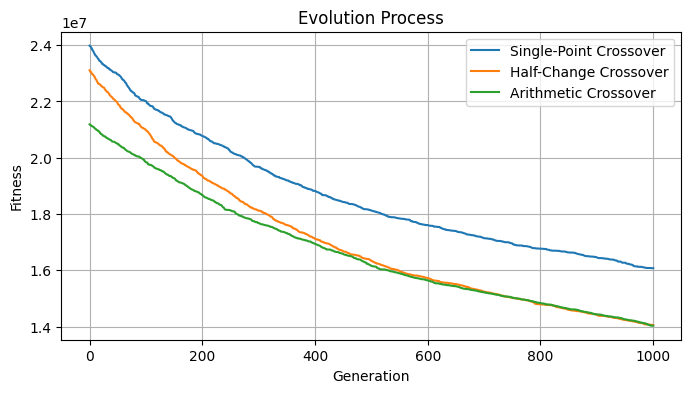

In [148]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["SquaredEuclideanRoulette"], label='Single-Point Crossover')
plt.plot(compareResults["SquaredEuclideanHalfChange"], label='Half-Change Crossover')
plt.plot(compareResults["SquaredEuclideanArithmetic"], label='Arithmetic Crossover')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

Both the Half-Change and the Arithmetic are good choices, but the Half-Change started in a worst position and was still able to catch up, therefore we will select it.

#### Mutation

##### Shuffle Mutation

In [150]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredEuclidean, crossover=halfChangeCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 23128692.0
Generation: 100
Best Fitness: 22000869.0
Generation: 200
Best Fitness: 21317302.0
Generation: 300
Best Fitness: 20826906.0
Generation: 400
Best Fitness: 20410251.0
Generation: 500
Best Fitness: 19966631.0
Generation: 600
Best Fitness: 19749915.0
Generation: 700
Best Fitness: 19666183.0
Generation: 800
Best Fitness: 19446961.0
Generation: 900
Best Fitness: 19230793.0
Generation: 1000
Best Fitness: 19059326.0
----------------------
Run: 1
Generation: 0
Best Fitness: 22161637.0
Generation: 100
Best Fitness: 21189786.0
Generation: 200
Best Fitness: 20747262.0
Generation: 300
Best Fitness: 20281697.0
Generation: 400
Best Fitness: 19969381.0
Generation: 500
Best Fitness: 19824444.0
Generation: 600
Best Fitness: 19557486.0
Generation: 700
Best Fitness: 19317005.0
Generation: 800
Best Fitness: 19168622.0
Generation: 900
Best Fitness: 18920846.0
Generation: 1000
Best Fitness: 18766505.0
----------------------
Run: 2
Generation: 0
Best Fitness: 23227

In [151]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    22993895.5
1    22974476.9
2    22971816.8
3    22947290.1
4    22947290.1
Name: AverageFitness, dtype: float64

In [152]:
compareResults["SquaredEuclideanShuffle"] = finalResults["AverageFitness"]

##### Analysis

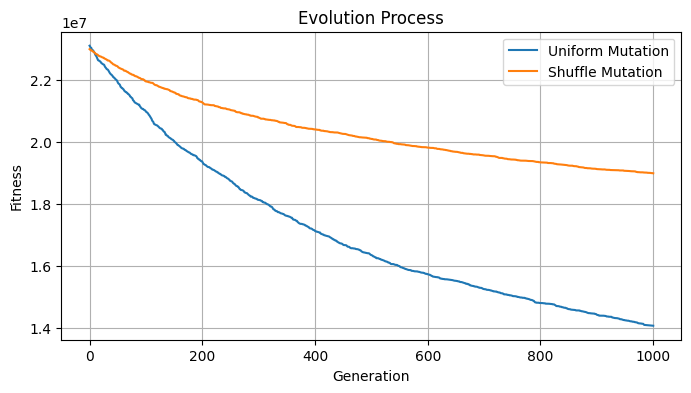

In [153]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["SquaredEuclideanHalfChange"], label='Uniform Mutation')
plt.plot(compareResults["SquaredEuclideanShuffle"], label='Shuffle Mutation')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

Once again the Uniform mutation is the winner.

#### Best Combination

- Fitness: Squared Euclidean
- Selection: Tournament
- Crossover: Half-Change
- Mutation: Uniform

### Manhattan Distance

#### Selection

##### Roulette

In [154]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=rouletteSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 149642
Generation: 100
Best Fitness: 140256
Generation: 200
Best Fitness: 134603
Generation: 300
Best Fitness: 132866
Generation: 400
Best Fitness: 128500
Generation: 500
Best Fitness: 123841
Generation: 600
Best Fitness: 122243
Generation: 700
Best Fitness: 120525
Generation: 800
Best Fitness: 119449
Generation: 900
Best Fitness: 116709
Generation: 1000
Best Fitness: 114575
----------------------
Run: 1
Generation: 0
Best Fitness: 146280
Generation: 100
Best Fitness: 139729
Generation: 200
Best Fitness: 133674
Generation: 300
Best Fitness: 129592
Generation: 400
Best Fitness: 124748
Generation: 500
Best Fitness: 120537
Generation: 600
Best Fitness: 119563
Generation: 700
Best Fitness: 116245
Generation: 800
Best Fitness: 115197
Generation: 900
Best Fitness: 113260
Generation: 1000
Best Fitness: 112072
----------------------
Run: 2
Generation: 0
Best Fitness: 149807
Generation: 100
Best Fitness: 139680
Generation: 200
Best Fitness: 136321
Generation: 

In [155]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    146672.9
1    146310.2
2    146192.0
3    146090.5
4    146071.7
Name: AverageFitness, dtype: float64

In [156]:
compareResults["ManhattanRoulette"] = finalResults["AverageFitness"]

##### Rank

In [157]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=rankSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 142380
Generation: 100
Best Fitness: 132386
Generation: 200
Best Fitness: 129513
Generation: 300
Best Fitness: 125949
Generation: 400
Best Fitness: 120766
Generation: 500
Best Fitness: 118378
Generation: 600
Best Fitness: 115521
Generation: 700
Best Fitness: 114094
Generation: 800
Best Fitness: 112275
Generation: 900
Best Fitness: 109839
Generation: 1000
Best Fitness: 108909
----------------------
Run: 1
Generation: 0
Best Fitness: 140265
Generation: 100
Best Fitness: 134056
Generation: 200
Best Fitness: 127415
Generation: 300
Best Fitness: 123290
Generation: 400
Best Fitness: 120004
Generation: 500
Best Fitness: 118087
Generation: 600
Best Fitness: 115695
Generation: 700
Best Fitness: 113990
Generation: 800
Best Fitness: 112463
Generation: 900
Best Fitness: 111439
Generation: 1000
Best Fitness: 109836
----------------------
Run: 2
Generation: 0
Best Fitness: 145832
Generation: 100
Best Fitness: 132678
Generation: 200
Best Fitness: 125992
Generation: 

In [158]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    143100.3
1    142962.6
2    142832.3
3    142743.6
4    142650.0
Name: AverageFitness, dtype: float64

In [159]:
compareResults["ManhattanRank"] = finalResults["AverageFitness"]

##### Tournament

In [160]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 141957
Generation: 100
Best Fitness: 134490
Generation: 200
Best Fitness: 126708
Generation: 300
Best Fitness: 121586
Generation: 400
Best Fitness: 118209
Generation: 500
Best Fitness: 114989
Generation: 600
Best Fitness: 111449
Generation: 700
Best Fitness: 108592
Generation: 800
Best Fitness: 105811
Generation: 900
Best Fitness: 103867
Generation: 1000
Best Fitness: 102223
----------------------
Run: 1
Generation: 0
Best Fitness: 140579
Generation: 100
Best Fitness: 134214
Generation: 200
Best Fitness: 126938
Generation: 300
Best Fitness: 122635
Generation: 400
Best Fitness: 118496
Generation: 500
Best Fitness: 116263
Generation: 600
Best Fitness: 113032
Generation: 700
Best Fitness: 109408
Generation: 800
Best Fitness: 107030
Generation: 900
Best Fitness: 105260
Generation: 1000
Best Fitness: 103514
----------------------
Run: 2
Generation: 0
Best Fitness: 140289
Generation: 100
Best Fitness: 131767
Generation: 200
Best Fitness: 123571
Generation: 

In [161]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    140788.7
1    140651.5
2    140611.9
3    140594.4
4    140512.7
Name: AverageFitness, dtype: float64

In [162]:
compareResults["ManhattanTournament"] = finalResults["AverageFitness"]

#### Analysis

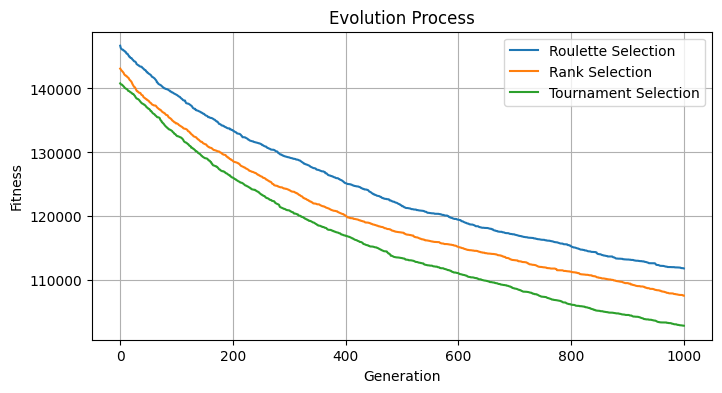

In [163]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["ManhattanRoulette"], label='Roulette Selection')
plt.plot(compareResults["ManhattanRank"], label='Rank Selection')
plt.plot(compareResults["ManhattanTournament"], label='Tournament Selection')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

The Torunament Selection is once again the best choice.

#### Crossover

##### Half-Change Crossover

In [164]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessManhattan, crossover=halfChangeCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 142838
Generation: 100
Best Fitness: 133626
Generation: 200
Best Fitness: 128077
Generation: 300
Best Fitness: 122018
Generation: 400
Best Fitness: 117488
Generation: 500
Best Fitness: 114437
Generation: 600
Best Fitness: 111573
Generation: 700
Best Fitness: 108753
Generation: 800
Best Fitness: 106741
Generation: 900
Best Fitness: 105445
Generation: 1000
Best Fitness: 103800
----------------------
Run: 1
Generation: 0
Best Fitness: 141803
Generation: 100
Best Fitness: 135816
Generation: 200
Best Fitness: 128084
Generation: 300
Best Fitness: 123217
Generation: 400
Best Fitness: 119126
Generation: 500
Best Fitness: 116086
Generation: 600
Best Fitness: 113603
Generation: 700
Best Fitness: 111303
Generation: 800
Best Fitness: 109669
Generation: 900
Best Fitness: 107648
Generation: 1000
Best Fitness: 105301
----------------------
Run: 2
Generation: 0
Best Fitness: 140985
Generation: 100
Best Fitness: 132915
Generation: 200
Best Fitness: 125618
Generation: 

In [165]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    141671.9
1    141626.3
2    141548.4
3    141452.5
4    141390.9
Name: AverageFitness, dtype: float64

In [166]:
compareResults["ManhattanHalfChange"] = finalResults["AverageFitness"]

#### Arithmetic Crossover

In [167]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessManhattan, crossover=arithmeticCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 141010
Generation: 100
Best Fitness: 133884
Generation: 200
Best Fitness: 128803
Generation: 300
Best Fitness: 122422
Generation: 400
Best Fitness: 119050
Generation: 500
Best Fitness: 115260
Generation: 600
Best Fitness: 112723
Generation: 700
Best Fitness: 110789
Generation: 800
Best Fitness: 109810
Generation: 900
Best Fitness: 107580
Generation: 1000
Best Fitness: 106071
----------------------
Run: 1
Generation: 0
Best Fitness: 141897
Generation: 100
Best Fitness: 131884
Generation: 200
Best Fitness: 126720
Generation: 300
Best Fitness: 122715
Generation: 400
Best Fitness: 117712
Generation: 500
Best Fitness: 114757
Generation: 600
Best Fitness: 112690
Generation: 700
Best Fitness: 109398
Generation: 800
Best Fitness: 108335
Generation: 900
Best Fitness: 105906
Generation: 1000
Best Fitness: 105033
----------------------
Run: 2
Generation: 0
Best Fitness: 142054
Generation: 100
Best Fitness: 132690
Generation: 200
Best Fitness: 127346
Generation: 

In [168]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    141272.6
1    141184.1
2    141079.7
3    140997.6
4    140929.5
Name: AverageFitness, dtype: float64

In [169]:
compareResults["ManhattanArithmetic"] = finalResults["AverageFitness"]

##### Analysis

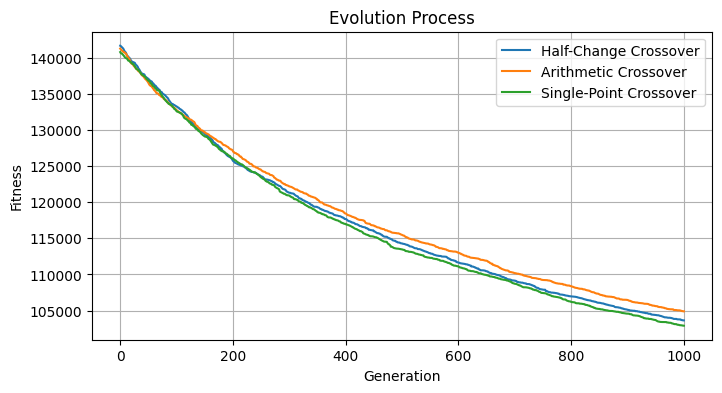

In [170]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["ManhattanHalfChange"], label='Half-Change Crossover')
plt.plot(compareResults["ManhattanArithmetic"], label='Arithmetic Crossover')
plt.plot(compareResults["ManhattanTournament"], label='Single-Point Crossover')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

For the crossover, the Single-Point crossover tends to perform a little better.

#### Mutation

##### Shuffle

In [171]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessManhattan, crossover=singlePointCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 142380
Generation: 100
Best Fitness: 138210
Generation: 200
Best Fitness: 134266
Generation: 300
Best Fitness: 131802
Generation: 400
Best Fitness: 130096
Generation: 500
Best Fitness: 128833
Generation: 600
Best Fitness: 128155
Generation: 700
Best Fitness: 126985
Generation: 800
Best Fitness: 126402
Generation: 900
Best Fitness: 125730
Generation: 1000
Best Fitness: 124853
----------------------
Run: 1
Generation: 0
Best Fitness: 140172
Generation: 100
Best Fitness: 135300
Generation: 200
Best Fitness: 131749
Generation: 300
Best Fitness: 129676
Generation: 400
Best Fitness: 127083
Generation: 500
Best Fitness: 125781
Generation: 600
Best Fitness: 124559
Generation: 700
Best Fitness: 123649
Generation: 800
Best Fitness: 122931
Generation: 900
Best Fitness: 121566
Generation: 1000
Best Fitness: 120607
----------------------
Run: 2
Generation: 0
Best Fitness: 143857
Generation: 100
Best Fitness: 137589
Generation: 200
Best Fitness: 133301
Generation: 

In [172]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    141402.7
1    141309.1
2    141302.3
3    141233.5
4    141225.8
Name: AverageFitness, dtype: float64

In [173]:
compareResults["ManhattanShuffle"] = finalResults["AverageFitness"]

##### Analysis

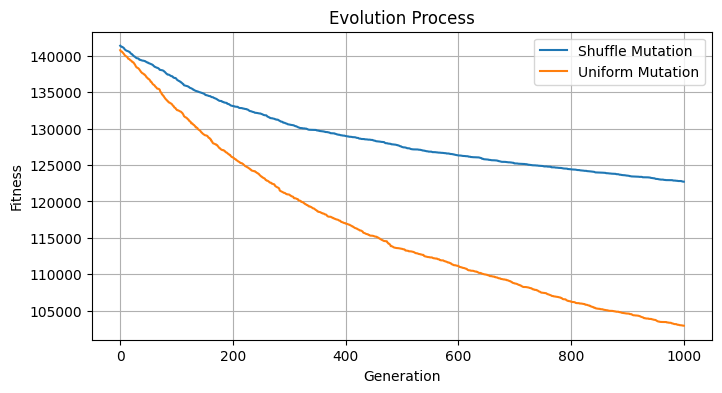

In [174]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["ManhattanShuffle"], label='Shuffle Mutation')
plt.plot(compareResults["ManhattanTournament"], label='Uniform Mutation')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

And finally we will choose the Uniform mutation.

#### Best Combination

- Fitness: Manhattan
- Selection: Tournament
- Crossover: Single-Point
- Mutation: Uniform

### Squared Manhattan Distance

#### Selection

##### Roulette Selection

In [177]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=rouletteSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 8345081
Generation: 100
Best Fitness: 7292303
Generation: 200
Best Fitness: 6517982
Generation: 300
Best Fitness: 5655762
Generation: 400
Best Fitness: 5375888
Generation: 500
Best Fitness: 4930046
Generation: 600
Best Fitness: 4410975
Generation: 700
Best Fitness: 4130812
Generation: 800
Best Fitness: 3740066
Generation: 900
Best Fitness: 3640354
Generation: 1000
Best Fitness: 3535751
----------------------
Run: 1
Generation: 0
Best Fitness: 8317090
Generation: 100
Best Fitness: 7635017
Generation: 200
Best Fitness: 6942361
Generation: 300
Best Fitness: 6221942
Generation: 400
Best Fitness: 5593162
Generation: 500
Best Fitness: 5035081
Generation: 600
Best Fitness: 4736995
Generation: 700
Best Fitness: 4480888
Generation: 800
Best Fitness: 4303796
Generation: 900
Best Fitness: 4196428
Generation: 1000
Best Fitness: 3971731
----------------------
Run: 2
Generation: 0
Best Fitness: 8072596
Generation: 100
Best Fitness: 6816770
Generation: 200
Best Fitn

In [178]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    8213308.5
1    8158064.7
2    8149458.4
3    8137687.4
4    8121270.7
Name: AverageFitness, dtype: float64

In [179]:
compareResults["SquaredManhattanRoulette"] = finalResults["AverageFitness"]

##### Rank Selection

In [180]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=rankSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 7825410
Generation: 100
Best Fitness: 6792037
Generation: 200
Best Fitness: 6023026
Generation: 300
Best Fitness: 5220659
Generation: 400
Best Fitness: 4779029
Generation: 500
Best Fitness: 4370080
Generation: 600
Best Fitness: 4089030
Generation: 700
Best Fitness: 4003924
Generation: 800
Best Fitness: 3647311
Generation: 900
Best Fitness: 3546574
Generation: 1000
Best Fitness: 3374496
----------------------
Run: 1
Generation: 0
Best Fitness: 8363765
Generation: 100
Best Fitness: 7015676
Generation: 200
Best Fitness: 6221008
Generation: 300
Best Fitness: 5538997
Generation: 400
Best Fitness: 5117952
Generation: 500
Best Fitness: 4788899
Generation: 600
Best Fitness: 4153852
Generation: 700
Best Fitness: 3992926
Generation: 800
Best Fitness: 3584715
Generation: 900
Best Fitness: 3393376
Generation: 1000
Best Fitness: 3282329
----------------------
Run: 2
Generation: 0
Best Fitness: 7957542
Generation: 100
Best Fitness: 6826345
Generation: 200
Best Fitn

In [181]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    8114601.2
1    8075547.1
2    8040848.0
3    8030876.3
4    8021208.4
Name: AverageFitness, dtype: float64

In [182]:
compareResults["SquaredManhattanRank"] = finalResults["AverageFitness"]

##### Tournament Selection

In [57]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 7675201
Generation: 100
Best Fitness: 6515168
Generation: 200
Best Fitness: 5487458
Generation: 300
Best Fitness: 4952454
Generation: 400
Best Fitness: 4194451
Generation: 500
Best Fitness: 3998697
Generation: 600
Best Fitness: 3697708
Generation: 700
Best Fitness: 3475573
Generation: 800
Best Fitness: 3258717
Generation: 900
Best Fitness: 3096235
Generation: 1000
Best Fitness: 2877748
----------------------
Run: 1
Generation: 0
Best Fitness: 7750990
Generation: 100
Best Fitness: 6081008
Generation: 200
Best Fitness: 5299323
Generation: 300
Best Fitness: 4823770
Generation: 400
Best Fitness: 4239272
Generation: 500
Best Fitness: 3815688
Generation: 600
Best Fitness: 3492564
Generation: 700
Best Fitness: 3302049
Generation: 800
Best Fitness: 3185991
Generation: 900
Best Fitness: 2969280
Generation: 1000
Best Fitness: 2848689
----------------------
Run: 2
Generation: 0
Best Fitness: 8071295
Generation: 100
Best Fitness: 6704698
Generation: 200
Best Fitn

In [59]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    7804661.2
1    7776705.2
2    7753432.0
3    7737070.2
4    7728924.1
Name: AverageFitness, dtype: float64

In [60]:
compareResults["SquaredManhattanTournament"] = finalResults["AverageFitness"]

##### Analysis

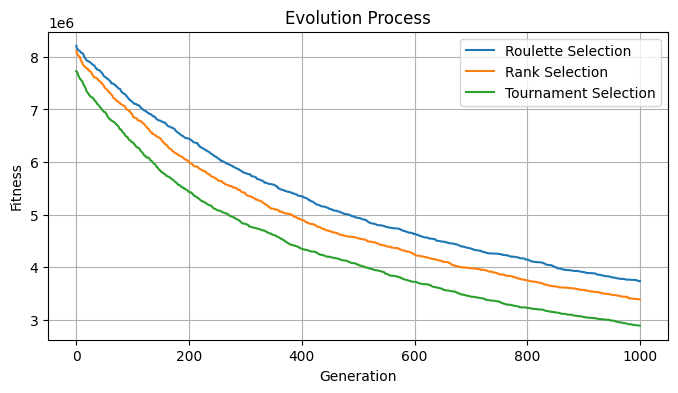

In [186]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["SquaredManhattanRoulette"], label='Roulette Selection')
plt.plot(compareResults["SquaredManhattanRank"], label='Rank Selection')
plt.plot(compareResults["SquaredManhattanTournament"], label='Tournament Selection')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

For our final fitness chice we will also choose the Tournament Selection.

#### Crossover

##### Half-Change Crossover

In [187]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=halfChangeCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 8006713
Generation: 100
Best Fitness: 6468803
Generation: 200
Best Fitness: 5727137
Generation: 300
Best Fitness: 5001970
Generation: 400
Best Fitness: 4320174
Generation: 500
Best Fitness: 3901342
Generation: 600
Best Fitness: 3647360
Generation: 700
Best Fitness: 3483106
Generation: 800
Best Fitness: 3281191
Generation: 900
Best Fitness: 3140434
Generation: 1000
Best Fitness: 2922155
----------------------
Run: 1
Generation: 0
Best Fitness: 7444303
Generation: 100
Best Fitness: 6289268
Generation: 200
Best Fitness: 5495448
Generation: 300
Best Fitness: 5107326
Generation: 400
Best Fitness: 4670074
Generation: 500
Best Fitness: 4377706
Generation: 600
Best Fitness: 4011345
Generation: 700
Best Fitness: 3769672
Generation: 800
Best Fitness: 3424685
Generation: 900
Best Fitness: 3300014
Generation: 1000
Best Fitness: 3037102
----------------------
Run: 2
Generation: 0
Best Fitness: 7749622
Generation: 100
Best Fitness: 6609601
Generation: 200
Best Fitn

In [188]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    7686395.6
1    7657156.5
2    7634671.9
3    7625919.4
4    7605917.2
Name: AverageFitness, dtype: float64

In [189]:
compareResults["SquaredManhattanHalfChange"] = finalResults["AverageFitness"]

##### Arithmetic Crossover

In [190]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=arithmeticCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 7229839
Generation: 100
Best Fitness: 6282883
Generation: 200
Best Fitness: 5478366
Generation: 300
Best Fitness: 4893833
Generation: 400
Best Fitness: 4305013
Generation: 500
Best Fitness: 4018193
Generation: 600
Best Fitness: 3598110
Generation: 700
Best Fitness: 3455272
Generation: 800
Best Fitness: 3157356
Generation: 900
Best Fitness: 3020279
Generation: 1000
Best Fitness: 2889342
----------------------
Run: 1
Generation: 0
Best Fitness: 6833827
Generation: 100
Best Fitness: 6091970
Generation: 200
Best Fitness: 5407455
Generation: 300
Best Fitness: 4943106
Generation: 400
Best Fitness: 4384624
Generation: 500
Best Fitness: 3993869
Generation: 600
Best Fitness: 3768691
Generation: 700
Best Fitness: 3529010
Generation: 800
Best Fitness: 3289314
Generation: 900
Best Fitness: 3155908
Generation: 1000
Best Fitness: 3092808
----------------------
Run: 2
Generation: 0
Best Fitness: 6948145
Generation: 100
Best Fitness: 5928854
Generation: 200
Best Fitn

In [191]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    7038671.2
1    7023402.8
2    7021199.9
3    7018184.7
4    7012957.3
Name: AverageFitness, dtype: float64

In [192]:
compareResults["SquaredManhattanArithmetic"] = finalResults["AverageFitness"]

##### Analysis

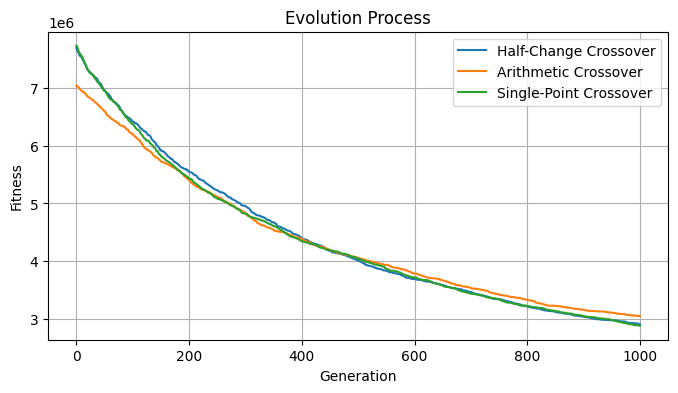

In [193]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["SquaredManhattanHalfChange"], label='Half-Change Crossover')
plt.plot(compareResults["SquaredManhattanArithmetic"], label='Arithmetic Crossover')
plt.plot(compareResults["SquaredManhattanTournament"], label='Single-Point Crossover')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

Once again, they are all very similar, but the Single-Point crossover seems to be a little bit better.

#### Mutation

##### Shuffle Mutation

In [54]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 7724518
Generation: 100
Best Fitness: 6313627
Generation: 200
Best Fitness: 5432233
Generation: 300
Best Fitness: 4965517
Generation: 400
Best Fitness: 4666803
Generation: 500
Best Fitness: 4539277
Generation: 600
Best Fitness: 4351279
Generation: 700
Best Fitness: 4230101
Generation: 800
Best Fitness: 4018371
Generation: 900
Best Fitness: 3820577
Generation: 1000
Best Fitness: 3684835
----------------------
Run: 1
Generation: 0
Best Fitness: 7401056
Generation: 100
Best Fitness: 6366812
Generation: 200
Best Fitness: 5839398
Generation: 300
Best Fitness: 5361036
Generation: 400
Best Fitness: 4981228
Generation: 500
Best Fitness: 4582334
Generation: 600
Best Fitness: 4245674
Generation: 700
Best Fitness: 4053644
Generation: 800
Best Fitness: 3883026
Generation: 900
Best Fitness: 3697576
Generation: 1000
Best Fitness: 3586160
----------------------
Run: 2
Generation: 0
Best Fitness: 7523234
Generation: 100
Best Fitness: 6099238
Generation: 200
Best Fitn

In [55]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    7689719.9
1    7682728.7
2    7671623.9
3    7666992.9
4    7652513.7
Name: AverageFitness, dtype: float64

In [56]:
compareResults["SquaredManhattanShuffle"] = finalResults["AverageFitness"]

##### Analysis

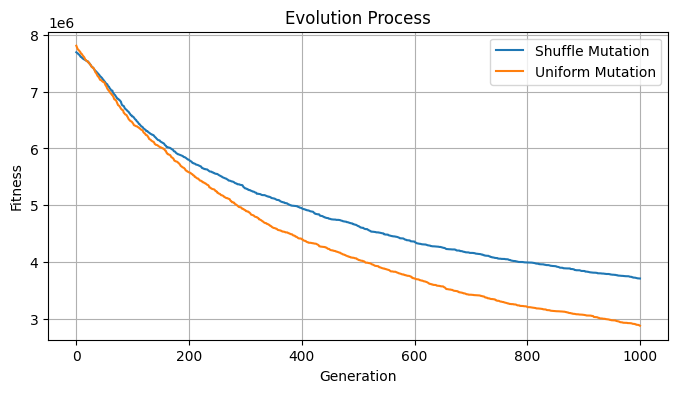

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["SquaredManhattanShuffle"], label='Shuffle Mutation')
plt.plot(compareResults["SquaredManhattanTournament"], label='Uniform Mutation')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

Last but not least, the Uniform mutation was the winner.

##### Best Combination

- Fitness: SquaredManhattan
- Selection: Tournament
- Crossover: Single-Point
- Mutation: Uniform

### Visualization of the GAs

We now have the best combination for each of our fitness choices, all that we need to do now is compare them.

We will do this both visually as well as graphically by normalizing their values and comparing them aginst each other.

In [114]:
finalComparison = pd.DataFrame()

#### Euclidean Distance

Generation: 0
Best Fitness: 91734.01226829938
Generation: 100
Best Fitness: 84905.69045081096
Generation: 200
Best Fitness: 81055.75468268721
Generation: 300
Best Fitness: 79020.47318620746
Generation: 400
Best Fitness: 76506.54256503121
Generation: 500
Best Fitness: 74793.608064677
Generation: 600
Best Fitness: 73391.23344112109
Generation: 700
Best Fitness: 71214.60105950212
Generation: 800
Best Fitness: 70224.02242293817
Generation: 900
Best Fitness: 69642.71265445721
Generation: 1000
Best Fitness: 68851.88099089866
Generation: 1100
Best Fitness: 68069.44541281751
Generation: 1200
Best Fitness: 67642.02121304494
Generation: 1300
Best Fitness: 66368.50659637467
Generation: 1400
Best Fitness: 65474.958310832466
Generation: 1500
Best Fitness: 65367.99080612121
Generation: 1600
Best Fitness: 64595.304993430946
Generation: 1700
Best Fitness: 64189.54321728194
Generation: 1800
Best Fitness: 63667.674376688265
Generation: 1900
Best Fitness: 63494.72994857984
Generation: 2000
Best Fitness: 

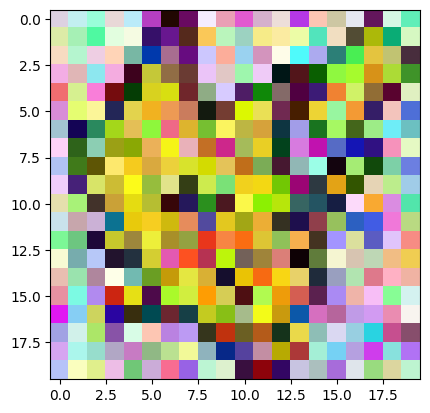

In [115]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=10000)

dataframe = GA[1]
plt.imshow(GA[0])

In [116]:
finalComparison = pd.concat([finalComparison, dataframe], axis=1)

#### Squared Euclidean

Generation: 0
Best Fitness: 23835475.0
Generation: 100
Best Fitness: 20837362.0
Generation: 200
Best Fitness: 18821396.0
Generation: 300
Best Fitness: 17436615.0
Generation: 400
Best Fitness: 16445115.0
Generation: 500
Best Fitness: 16008625.0
Generation: 600
Best Fitness: 15763087.0
Generation: 700
Best Fitness: 14863438.0
Generation: 800
Best Fitness: 14108787.0
Generation: 900
Best Fitness: 13694477.0
Generation: 1000
Best Fitness: 13520319.0
Generation: 1100
Best Fitness: 13276407.0
Generation: 1200
Best Fitness: 12949063.0
Generation: 1300
Best Fitness: 12744800.0
Generation: 1400
Best Fitness: 12702752.0
Generation: 1500
Best Fitness: 12466870.0
Generation: 1600
Best Fitness: 12277156.0
Generation: 1700
Best Fitness: 12001988.0
Generation: 1800
Best Fitness: 11929129.0
Generation: 1900
Best Fitness: 11643936.0
Generation: 2000
Best Fitness: 11404681.0
Generation: 2100
Best Fitness: 11393372.0
Generation: 2200
Best Fitness: 11243920.0
Generation: 2300
Best Fitness: 11092376.0
Gene

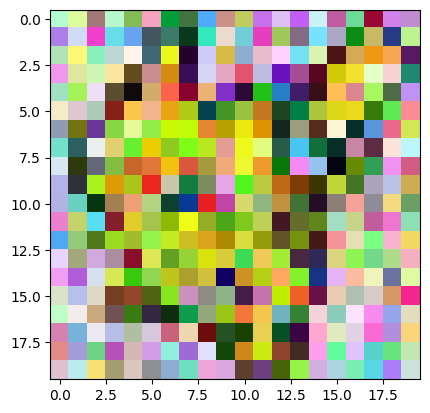

In [117]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredEuclidean, crossover=halfChangeCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=10000)

dataframe = GA[1]
plt.imshow(GA[0])

In [118]:
finalComparison = pd.concat([finalComparison, dataframe], axis=1)

#### Manhattan Distance

Generation: 0
Best Fitness: 140253
Generation: 100
Best Fitness: 132663
Generation: 200
Best Fitness: 126476
Generation: 300
Best Fitness: 121803
Generation: 400
Best Fitness: 118033
Generation: 500
Best Fitness: 115474
Generation: 600
Best Fitness: 112517
Generation: 700
Best Fitness: 111067
Generation: 800
Best Fitness: 108090
Generation: 900
Best Fitness: 105565
Generation: 1000
Best Fitness: 104315
Generation: 1100
Best Fitness: 102740
Generation: 1200
Best Fitness: 101032
Generation: 1300
Best Fitness: 99193
Generation: 1400
Best Fitness: 97914
Generation: 1500
Best Fitness: 97088
Generation: 1600
Best Fitness: 96555
Generation: 1700
Best Fitness: 95425
Generation: 1800
Best Fitness: 94564
Generation: 1900
Best Fitness: 93485
Generation: 2000
Best Fitness: 92275
Generation: 2100
Best Fitness: 91765
Generation: 2200
Best Fitness: 90912
Generation: 2300
Best Fitness: 90218
Generation: 2400
Best Fitness: 90166
Generation: 2500
Best Fitness: 89294
Generation: 2600
Best Fitness: 88948


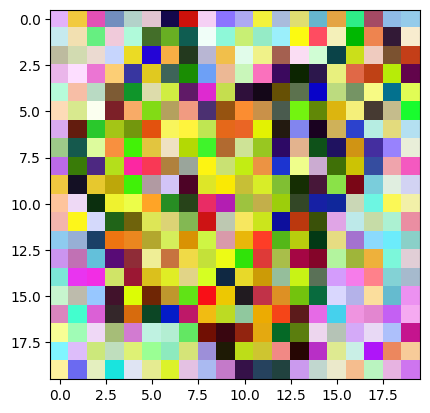

In [119]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=10000)

dataframe = GA[1]
plt.imshow(GA[0])

In [120]:
finalComparison = pd.concat([finalComparison, dataframe], axis=1)

#### Squared Manhattan

Generation: 0
Best Fitness: 55595046
Generation: 100
Best Fitness: 50141274
Generation: 200
Best Fitness: 45145463
Generation: 300
Best Fitness: 42511287
Generation: 400
Best Fitness: 40163755
Generation: 500
Best Fitness: 38466207
Generation: 600
Best Fitness: 36812931
Generation: 700
Best Fitness: 35417037
Generation: 800
Best Fitness: 33781429
Generation: 900
Best Fitness: 32242980
Generation: 1000
Best Fitness: 30995410
Generation: 1100
Best Fitness: 30114556
Generation: 1200
Best Fitness: 28858190
Generation: 1300
Best Fitness: 28442746
Generation: 1400
Best Fitness: 27686669
Generation: 1500
Best Fitness: 27228782
Generation: 1600
Best Fitness: 26661538
Generation: 1700
Best Fitness: 26237425
Generation: 1800
Best Fitness: 26012273
Generation: 1900
Best Fitness: 25623092
Generation: 2000
Best Fitness: 25582911
Generation: 2100
Best Fitness: 25069534
Generation: 2200
Best Fitness: 25020134
Generation: 2300
Best Fitness: 24854027
Generation: 2400
Best Fitness: 24351457
Generation: 

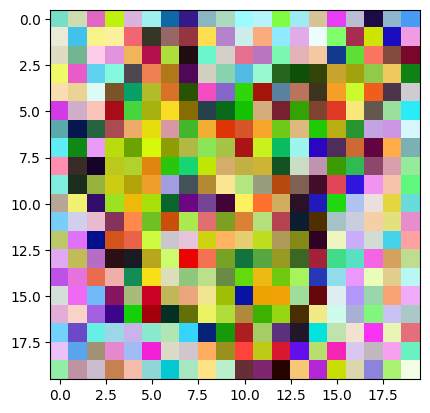

In [121]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=10000)

dataframe = GA[1]
plt.imshow(GA[0])

In [122]:
finalComparison = pd.concat([finalComparison, dataframe], axis=1)

### Normalizing Values

We will use a min-max funtion, the actual values are not relevant to us, the only thing that we want to compare is the progression of the GA.

In [123]:
finalComparison.columns.values[0] = 'Euclidean'
finalComparison.columns.values[1] = 'Squared Euclidean'
finalComparison.columns.values[2] = 'Manhattan'
finalComparison.columns.values[3] = 'Squared Manhattan'

In [124]:
finalComparison.head()

,Euclidean,Squared Euclidean,Manhattan,Squared Manhattan
0,91734.012268,23835475.0,140253,55595046
1,91734.012268,23835475.0,140219,55595046
2,91715.953919,23835475.0,140219,55595046
3,91419.338490,23835475.0,140219,55595046
4,91419.338490,23704402.0,140075,55595046


In [147]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaledData = scaler.fit_transform(finalComparison)

scaledFinalComparison = pd.DataFrame(scaledData, columns=finalComparison.columns)

In [148]:
scaledFinalComparison.head()

,Euclidean,Squared Euclidean,Manhattan,Squared Manhattan,Euclidean Normalized,Squared Euclidean Normalized,Manhattan Normalized,Squared Manhattan Normalized
0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0
1,1.000000,1.000000,0.999520,1.0,1.000000,1.000000,0.999520,1.0
2,0.999600,1.000000,0.999520,1.0,0.999600,1.000000,0.999520,1.0
3,0.993028,1.000000,0.999520,1.0,0.993028,1.000000,0.999520,1.0
4,0.993028,0.992106,0.997488,1.0,0.993028,0.992106,0.997488,1.0


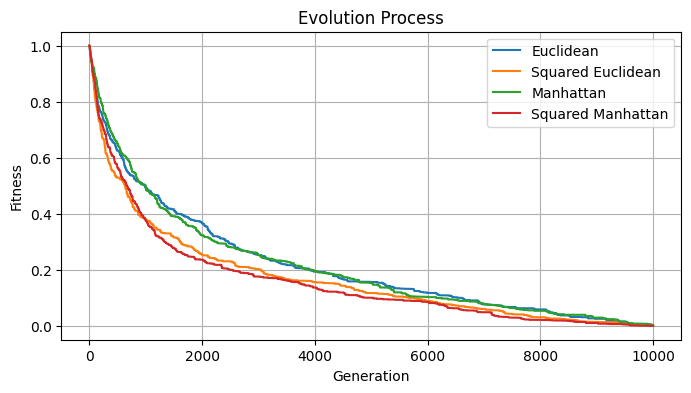

In [150]:
plt.figure(figsize=(8, 4))
plt.plot(scaledFinalComparison["Euclidean"], label='Euclidean')
plt.plot(scaledFinalComparison["Squared Euclidean"], label='Squared Euclidean')
plt.plot(scaledFinalComparison["Manhattan"], label='Manhattan')
plt.plot(scaledFinalComparison["Squared Manhattan"], label='Squared Manhattan')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

As we can see the Squared Distances ended up being more beneficial, and between them it seems that the Manhattan is slightly better. Not only that but the algorihtm is also faster to calculate the Manhattan over the Euclidean, so this is a win-win situation.

### Double Tournament Selection

With all of this dones we decided to try to implement some more robust Tournament Selections, in order to try to further optimize the GA.

Our first approach was to make a double tournament where the winner of the tournament would compete ina second tounament with all the other winners. By doing so we would almost guarantee that we would always get the better individuals.

In [138]:
population = initialPopulation('Pikachu.png', 5)

In [139]:
def doubleTournamentSelection(population, original, getFitness, function, size=20):

    newPopulation = []

    for _ in range(len(population)):

        secondTournament = []

        for _ in range(size):

            firstTournament = []

            for _ in range(size):
                firstTournament.append(population[random.randint(0, len(population)-1)])

            tournamentFitnesses = [getFitness(element, original, function) for element in firstTournament]

            secondTournament.append(firstTournament[tournamentFitnesses.index(min(tournamentFitnesses))])
        
        tournamentFitnesses = [getFitness(element, original, function) for element in secondTournament]

        newPopulation.append(secondTournament[tournamentFitnesses.index(min(tournamentFitnesses))])

    return newPopulation

In [142]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

93031.7158746906
97534.8031432261
97244.10789324372
94298.79521517588
95711.20654881802


In [144]:
newPopulation = doubleTournamentSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

93031.7158746906
93031.7158746906
93031.7158746906
93031.7158746906
93031.7158746906


Due to its complexity, it is extremely slow to run the GA, therefore it ended up not being a plausible solution, even though theoretically it could improve the results obtained from a simple Tournament Selection.

### Weighted Tournament Selection

In this approach we used the idea behind the Roulette selection and implemented a probability of choosing the competitors for the tournament, by doing so we were already filtering som of the individuals, and despite everyone having a chance of going to the next generation, it would be way more probable for the competitors to be the best individuals.

In [153]:
population = initialPopulation('Pikachu.png', 5)

In [154]:
def weightedTournamentSelection(population, original, getFitness, function, size=20):

    newPopulation = []

    for _ in range(len(population)):

        tournament = []

        fitnesses = [getFitness(element, original, function) for element in population]

        for i in range(len(fitnesses)):
            fitnesses[fitnesses.index(max(fitnesses))] = i + 1

        selectionProbs = [rank / sum(fitnesses) for rank in fitnesses]

        for _ in range(size):
            tournament.append(population[npr.choice(len(population), p=selectionProbs)])

        tournamentFitnesses = [getFitness(element, original, function) for element in tournament]

        newPopulation.append(tournament[tournamentFitnesses.index(min(tournamentFitnesses))])

    return newPopulation

In [155]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

96173.07312737835
93244.76618349539
92116.17893529865
94069.35309625475
90415.54983973753


In [156]:
newPopulation = weightedTournamentSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

90415.54983973753
90415.54983973753
90415.54983973753
90415.54983973753
90415.54983973753


Generation: 0
Best Fitness: 54406968
Generation: 100
Best Fitness: 48697698
Generation: 200
Best Fitness: 46012400
Generation: 300
Best Fitness: 43771273
Generation: 400
Best Fitness: 41343324
Generation: 500
Best Fitness: 39722865
Generation: 600
Best Fitness: 36869107
Generation: 700
Best Fitness: 35886915
Generation: 800
Best Fitness: 34496376
Generation: 900
Best Fitness: 33793451
Generation: 1000
Best Fitness: 32578848
Generation: 1100
Best Fitness: 32185691
Generation: 1200
Best Fitness: 31507734
Generation: 1300
Best Fitness: 30806305
Generation: 1400
Best Fitness: 29934375
Generation: 1500
Best Fitness: 29263611
Generation: 1600
Best Fitness: 28890454
Generation: 1700
Best Fitness: 27977462
Generation: 1800
Best Fitness: 27513133
Generation: 1900
Best Fitness: 27274539
Generation: 2000
Best Fitness: 26484950
Generation: 2100
Best Fitness: 26060638
Generation: 2200
Best Fitness: 25694067
Generation: 2300
Best Fitness: 25216620
Generation: 2400
Best Fitness: 24999042
Generation: 

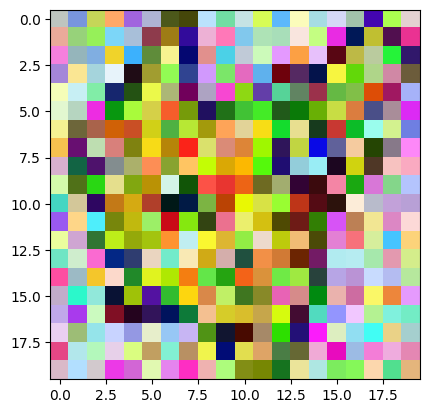

In [157]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=weightedTournamentSelection, numberGenerations=10000)

dataframe = GA[1]
plt.imshow(GA[0])

In [199]:
finalComparison = pd.concat([finalComparison, dataframe], axis=1)

In [180]:
finalComparison.columns.values[4] = 'Weighted Squared Manhattan'

In [202]:
scaledData = scaler.fit_transform(finalComparison)

scaledFinalComparison = pd.DataFrame(scaledData, columns=finalComparison.columns)

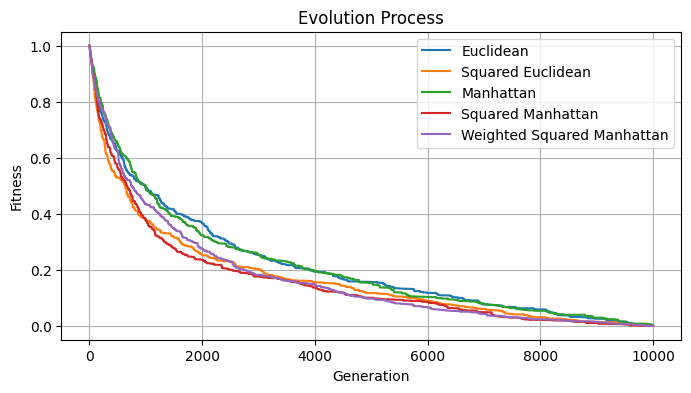

In [203]:
plt.figure(figsize=(8, 4))
plt.plot(scaledFinalComparison["Euclidean"], label='Euclidean')
plt.plot(scaledFinalComparison["Squared Euclidean"], label='Squared Euclidean')
plt.plot(scaledFinalComparison["Manhattan"], label='Manhattan')
plt.plot(scaledFinalComparison["Squared Manhattan"], label='Squared Manhattan')
plt.plot(scaledFinalComparison["Weighted Squared Manhattan"], label='Weighted Squared Manhattan')

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

We can clearly verify that the Squared Distances were better approaches to solve this problem, also, we verify that the randomness associated with the selection of the individuals from the Tournament Selection ended up performing better than the Weighted Tournament, we can assume that the introduction of several individuals that are not the better at each generation, by being selected randomly instead, ended up being more beneficial for the population in the long run.

Final Model for Optimization:
- Fitness: Squared Manhattan
- Selection: Tournament
- Crossover: Single-Point
- Mutation: Uniform

### Optimizing Crossover and Mutation Probabilites

We will finally try to get the best values for the crossover and mutation probabilities.

Since we have an infinite amount of combinations, we will simply try to increase one and decrease the other and vice-versa, to get an overall good combination.

In [52]:
compareResults = pd.DataFrame()

##### 80% / 1%

In [56]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 56200073
Generation: 100
Best Fitness: 53553632
Generation: 200
Best Fitness: 51521312
Generation: 300
Best Fitness: 49434022
Generation: 400
Best Fitness: 48717606
Generation: 500
Best Fitness: 47729714
Generation: 600
Best Fitness: 47397487
Generation: 700
Best Fitness: 46903975
Generation: 800
Best Fitness: 46209089
Generation: 900
Best Fitness: 45508916
Generation: 1000
Best Fitness: 45247420
----------------------
Run: 1
Generation: 0
Best Fitness: 56809771
Generation: 100
Best Fitness: 53704733
Generation: 200
Best Fitness: 51608660
Generation: 300
Best Fitness: 49428292
Generation: 400
Best Fitness: 48502254
Generation: 500
Best Fitness: 47602814
Generation: 600
Best Fitness: 47054046
Generation: 700
Best Fitness: 46471941
Generation: 800
Best Fitness: 46180392
Generation: 900
Best Fitness: 45467951
Generation: 1000
Best Fitness: 45037562
----------------------
Run: 2
Generation: 0
Best Fitness: 56656370
Generation: 100
Best Fitness: 53367987
G

In [57]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    56244273.3
1    56239679.7
2    56189470.1
3    56166190.5
4    56137289.3
Name: AverageFitness, dtype: float64

In [58]:
compareResults["80% / 1%"] = finalResults["AverageFitness"]

##### 80% / 5%

In [59]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, mutationProb=0.05, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 54496667
Generation: 100
Best Fitness: 50621507
Generation: 200
Best Fitness: 49278015
Generation: 300
Best Fitness: 48365343
Generation: 400
Best Fitness: 47967099
Generation: 500
Best Fitness: 47855415
Generation: 600
Best Fitness: 47785727
Generation: 700
Best Fitness: 47692127
Generation: 800
Best Fitness: 47569699
Generation: 900
Best Fitness: 47236931
Generation: 1000
Best Fitness: 47225087
----------------------
Run: 1
Generation: 0
Best Fitness: 56624454
Generation: 100
Best Fitness: 53110562
Generation: 200
Best Fitness: 52278586
Generation: 300
Best Fitness: 51889850
Generation: 400
Best Fitness: 51259110
Generation: 500
Best Fitness: 51062142
Generation: 600
Best Fitness: 50934202
Generation: 700
Best Fitness: 50342274
Generation: 800
Best Fitness: 50287114
Generation: 900
Best Fitness: 49968586
Generation: 1000
Best Fitness: 49915918
----------------------
Run: 2
Generation: 0
Best Fitness: 56628979
Generation: 100
Best Fitness: 53039523
G

In [60]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    55954195.5
1    55859767.5
2    55779017.9
3    55663035.5
4    55633345.1
Name: AverageFitness, dtype: float64

In [61]:
compareResults["80% / 5%"] = finalResults["AverageFitness"]

##### 90% / 1%

In [62]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, crossoverProb=0.9, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 56426557
Generation: 100
Best Fitness: 54159062
Generation: 200
Best Fitness: 52660306
Generation: 300
Best Fitness: 51055204
Generation: 400
Best Fitness: 49585226
Generation: 500
Best Fitness: 49169643
Generation: 600
Best Fitness: 48382562
Generation: 700
Best Fitness: 47743431
Generation: 800
Best Fitness: 47459413
Generation: 900
Best Fitness: 46715090
Generation: 1000
Best Fitness: 46281548
----------------------
Run: 1
Generation: 0
Best Fitness: 56175850
Generation: 100
Best Fitness: 53599108
Generation: 200
Best Fitness: 51694632
Generation: 300
Best Fitness: 50907607
Generation: 400
Best Fitness: 50485028
Generation: 500
Best Fitness: 50223396
Generation: 600
Best Fitness: 49123478
Generation: 700
Best Fitness: 48831198
Generation: 800
Best Fitness: 48318353
Generation: 900
Best Fitness: 47933209
Generation: 1000
Best Fitness: 47316509
----------------------
Run: 2
Generation: 0
Best Fitness: 56849056
Generation: 100
Best Fitness: 54376901
G

In [63]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    56426995.3
1    56414888.5
2    56329087.9
3    56294347.1
4    56264781.5
Name: AverageFitness, dtype: float64

In [64]:
compareResults["90% / 1%"] = finalResults["AverageFitness"]

##### 90% / 5%

In [65]:
finalResults = pd.DataFrame()

for i in range(10):

    print("Run:", i)

    Initialization = initialize("Pikachu.png", 100)

    originalGrid = Initialization[0]
    population = Initialization[1]

    GA = geneticAlgorithm(population=population, original=originalGrid, crossoverProb=0.9, mutationProb=0.05, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=shuffleMutation, selection=tournamentSelection, numberGenerations=1000)

    dataframe = GA[1]
    finalResults = pd.concat([finalResults, dataframe], axis=1)

    print("----------------------")

Run: 0
Generation: 0
Best Fitness: 55329649
Generation: 100
Best Fitness: 51547133
Generation: 200
Best Fitness: 50331357
Generation: 300
Best Fitness: 49490773
Generation: 400
Best Fitness: 49278317
Generation: 500
Best Fitness: 49207897
Generation: 600
Best Fitness: 48943485
Generation: 700
Best Fitness: 48698477
Generation: 800
Best Fitness: 48537225
Generation: 900
Best Fitness: 48276493
Generation: 1000
Best Fitness: 48234193
----------------------
Run: 1
Generation: 0
Best Fitness: 56529556
Generation: 100
Best Fitness: 52013648
Generation: 200
Best Fitness: 50633304
Generation: 300
Best Fitness: 49599032
Generation: 400
Best Fitness: 49379008
Generation: 500
Best Fitness: 49033572
Generation: 600
Best Fitness: 48869044
Generation: 700
Best Fitness: 48709824
Generation: 800
Best Fitness: 48709824
Generation: 900
Best Fitness: 48690648
Generation: 1000
Best Fitness: 48467132
----------------------
Run: 2
Generation: 0
Best Fitness: 54843817
Generation: 100
Best Fitness: 51892045
G

In [66]:
finalResults["AverageFitness"] = finalResults.mean(axis=1)
finalResults["AverageFitness"].head()

0    56492101.2
1    56372316.0
2    56336442.0
3    56239524.8
4    56120806.4
Name: AverageFitness, dtype: float64

In [67]:
compareResults["90% / 5%"] = finalResults["AverageFitness"]

##### Analysis

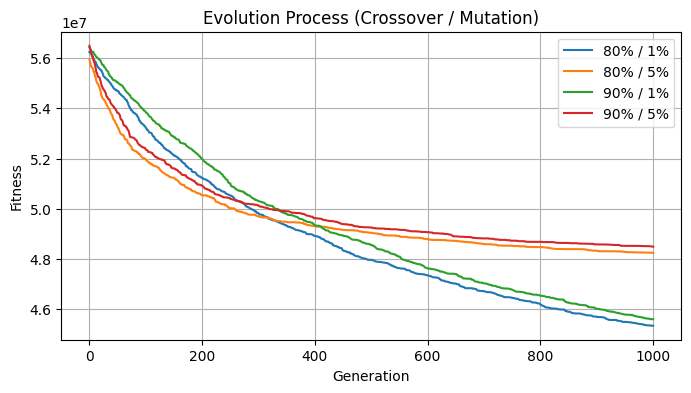

In [68]:
plt.figure(figsize=(8, 4))
plt.plot(compareResults["80% / 1%"], label='80% / 1%')
plt.plot(compareResults["80% / 5%"], label='80% / 5%')
plt.plot(compareResults["90% / 1%"], label='90% / 1%')
plt.plot(compareResults["90% / 5%"], label='90% / 5%')

plt.title('Evolution Process (Crossover / Mutation)')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.legend()
plt.show()

As we can see a smaller value of mutation and crossover is more beneficial to the GA, despite the oposite being true for the initial generations, therefore we will use the 80% crossover probability and 1% mutation probability.

### Final Genetic Algorithm

Generation: 0
Best Fitness: 56914277
Generation: 100
Best Fitness: 50136472
Generation: 200
Best Fitness: 45257592
Generation: 300
Best Fitness: 41219666
Generation: 400
Best Fitness: 40022935
Generation: 500
Best Fitness: 37725274
Generation: 600
Best Fitness: 35317982
Generation: 700
Best Fitness: 34059796
Generation: 800
Best Fitness: 32618679
Generation: 900
Best Fitness: 31172991
Generation: 1000
Best Fitness: 30352319
Generation: 1100
Best Fitness: 29581140
Generation: 1200
Best Fitness: 29165977
Generation: 1300
Best Fitness: 28742932
Generation: 1400
Best Fitness: 27797268
Generation: 1500
Best Fitness: 27333809
Generation: 1600
Best Fitness: 27169838
Generation: 1700
Best Fitness: 26865338
Generation: 1800
Best Fitness: 26613844
Generation: 1900
Best Fitness: 25934165
Generation: 2000
Best Fitness: 25468220
Generation: 2100
Best Fitness: 24956017
Generation: 2200
Best Fitness: 24665251
Generation: 2300
Best Fitness: 24518961
Generation: 2400
Best Fitness: 24482138
Generation: 

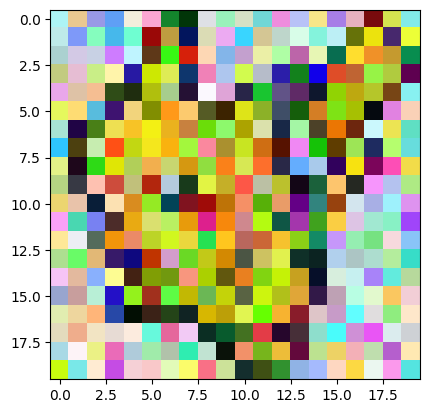

In [69]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, crossoverProb=0.8, mutationProb=0.01, fitness=getPixelFitnessSquaredManhattan, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=20000)

dataframe = GA[1]
plt.imshow(GA[0])

We can clearly see that there is a pikachu in the picture, not only that but we see the difference between the darker and lighter colors in the picture quite well, even if they are not white pixels, they are close enough for us to be able to perceive what the original image was.

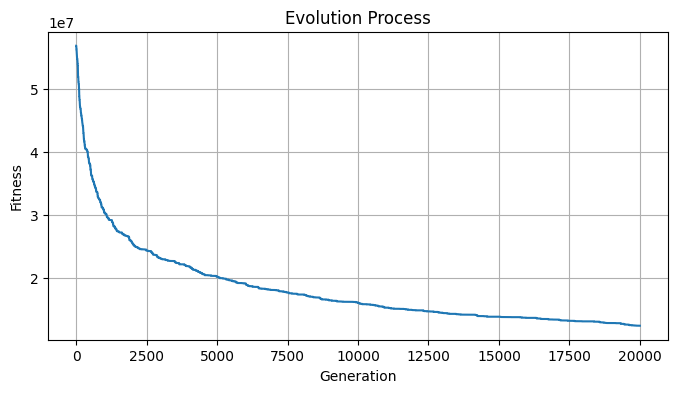

In [70]:
plt.figure(figsize=(8, 4))
plt.plot(dataframe["fitness"])

plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.grid(True)
plt.show()

As for the evolution, we can verify that we started with a huge improvement that continuously becomes less and less impactful. However, we can still see that the fitness is decreasing at a considerable rate and that it is converging to 0, meaning that eventually, with enough generations, we would be able to recreate in its entirty the original image.